# Classification Models Tutorial  
In this notebook, we'll train and evaluate Classification Models.

We'll start with a `TreeClassifier` model on a sample dataset that contains both numeric and nominal attributes.

We'll start by loading the dataset; in this case, the infamous golf dataset to predict if a given day has the adequate climate to play golf.

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.preprocessing import LabelEncoder


def read_classification_dataset(url: str):
    df = pd.read_csv(url)
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return x, y, y.unique()


dataset_name = "golf_classification"
url = "https://raw.githubusercontent.com/facundoq/facundoq.github.io/refs/heads/master/datasets/classification/golf_classification_numeric.csv"
x, y, class_names = read_classification_dataset(url)

print(x.dtypes)
print(y)
print(class_names)

Sky            object
Temperature     int64
Humidity        int64
Wind           object
dtype: object
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object
['no' 'yes']


# Model definition
Our model can be defined in the same way as a normal `sklearn.tree.DecisionTreeClassifier`, and it will use nominal attributes without a need for numerization.

Additionally you can specify hiperparameters of the model, which are analogous to the `sklearn` class, such as the maximum height of the tree, minimum samples to create a leaf node, and the minimum decrease in error necessary to create a new node.

In [ ]:
from sklearn_nominal import TreeClassifier

# default hiperparameters
model = TreeClassifier()
# custom hiperparameters
model = TreeClassifier(
    criterion="entropy", max_depth=4, min_samples_leaf=1, min_error_decrease=1e-16
)

# Training and evaluation

To make this short, we'll both train and evaluate on the train set using the typical `fit` and `predict` methods. This is no different than with any other `scikit-learn` models.

In [4]:
from sklearn.metrics import accuracy_score

model.fit(x, y)
y_pred = model.predict(x)
print(f"Dataset {dataset_name:40} accuracy: {accuracy_score(y, y_pred) * 100:.2f}%")

Dataset golf_classification                      accuracy: 92.86%


# Visualization
Finally, we'll want to visualize our trained tree. We have two choices: a plain text pretty printing of the tree with `model.pretty_print()`, or a full blown `graphviz` graph with `model.display(...)` or `model.export_dot(...)` and relatives. Since this is a classification model, we'll want to pass the class names along for better output.



In [5]:
print(model.pretty_print(class_names=class_names))

root
|   🪵Sky=rainy => 
|   |   🪵Wind=no => yes
|   |   🪵Wind=yes => no
|   🪵Sky=cloudy => yes
|   🪵Sky=sunny => 
|   |   🪵Humidity <= 85 => 
|   |   |   🪵Temperature <= 69 => yes
|   |   |   🪵Temperature > 69 => no
|   |   🪵Humidity > 85 => no


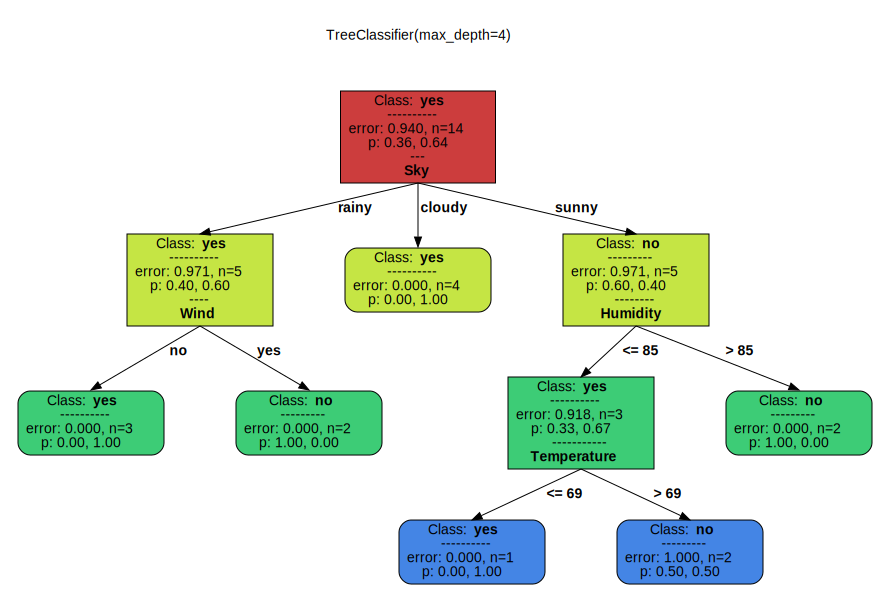

In [6]:
model.display(title=f"{model}", class_names=class_names)

# Other models
`sklearn_nominal` also offers `PRISM`, `CN2`, `OneR` and `ZeroR` [rule based classifiers](https://christophm.github.io/interpretable-ml-book/rules.html). These are actually different training strategies, but they all generate the same type of `RuleModel` model.

1. [PRISM](https://www.sciencedirect.com/science/article/abs/pii/S0020737387800032)
2. [CN2](https://link.springer.com/article/10.1023/A:1022641700528)
3. [ZeroR/OneR](https://link.springer.com/article/10.1023/A:1022631118932)




In [ ]:
from sklearn_nominal.scikit.naive_bayes import NaiveBayesClassifier
from sklearn_nominal.scikit.rule_cn2 import CN2Classifier
from sklearn_nominal.scikit.rule_oner import OneRClassifier
from sklearn_nominal.scikit.rule_prism import PRISMClassifier
from sklearn_nominal.scikit.rule_zeror import ZeroRClassifier


models = [
    PRISMClassifier(min_rule_support=1),
    CN2Classifier(min_rule_support=1),
    OneRClassifier(),
    ZeroRClassifier(),
    NaiveBayesClassifier(),
]

for model in models:
    model.fit(x, y)
    y_pred = model.predict(x)
    score = accuracy_score(y, y_pred)

    print("===" * 20)
    print(f"Model {model}")
    print(model.pretty_print(class_names))
    print("---" * 20)
    print(f"Accuracy: {score:.3f}")
    print("===" * 20)
    print()

Model PRISMClassifier(min_rule_support=1)
(Sky=sunny) AND (Temperature > 76.2)   => no
(Sky=rainy) AND (Wind=yes)             => no
(Sky=sunny) AND (Humidity > 78.33)     => no
(Sky=cloudy)                           => yes
(Humidity <= 82.7) AND (Sky=sunny)     => yes
(Sky=rainy) AND (Wind=no)              => yes
Default: [0.35714286 0.64285714]
------------------------------------------------------------
Accuracy: 1.000

Model CN2Classifier(min_rule_support=1)
(Sky=cloudy)                        => yes
(Humidity > 82.7) AND (Sky=sunny)   => no
(Wind=no)                           => yes
(Sky=rainy)                         => no
Default: [0. 1.]
------------------------------------------------------------
Accuracy: 1.000

Model OneRClassifier()
Sky=sunny    => no
Sky=cloudy   => yes
Sky=rainy    => yes
Default: [0.35714286 0.64285714]
------------------------------------------------------------
Accuracy: 0.714

Model ZeroRClassifier()
Default: [0.35714286 0.64285714]
-------------------